# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
df = pd.read_csv("../data/TwoGroupIQ.csv")
# Only work with the "Smart Drug" group
smart = df[df.Group == "Smart Drug"]

print len(smart)
smart.head()

63


,Score,Group
0,102,Smart Drug
1,107,Smart Drug
2,92,Smart Drug
3,101,Smart Drug
4,110,Smart Drug


In [3]:
with pm.Model() as model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25)  # Gelman 2006
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    nu = pm.Exponential("nu", 1.0 / 29)   # Taken from the book
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu, sd=sigma, observed=smart.Score)
    # Sample
    trace = pm.sample(draws=6000, tune=1000, chain=3)
    
burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -360.41: 100%|██████████| 200000/200000 [00:16<00:00, 12093.46it/s]
Finished [100%]: Average ELBO = -354.45
100%|██████████| 6000/6000 [00:10<00:00, 803.94it/s]


             mean         sd  mc_error     hpd_2.5    hpd_97.5
mu     107.137986   2.886580  0.052659  101.226407  112.718751
sigma   19.295019   3.519813  0.144445   13.215810   26.700444
nu       8.771572  12.216021  0.434304    1.195033   27.314360


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113d819d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1128b34d0>]], dtype=object)

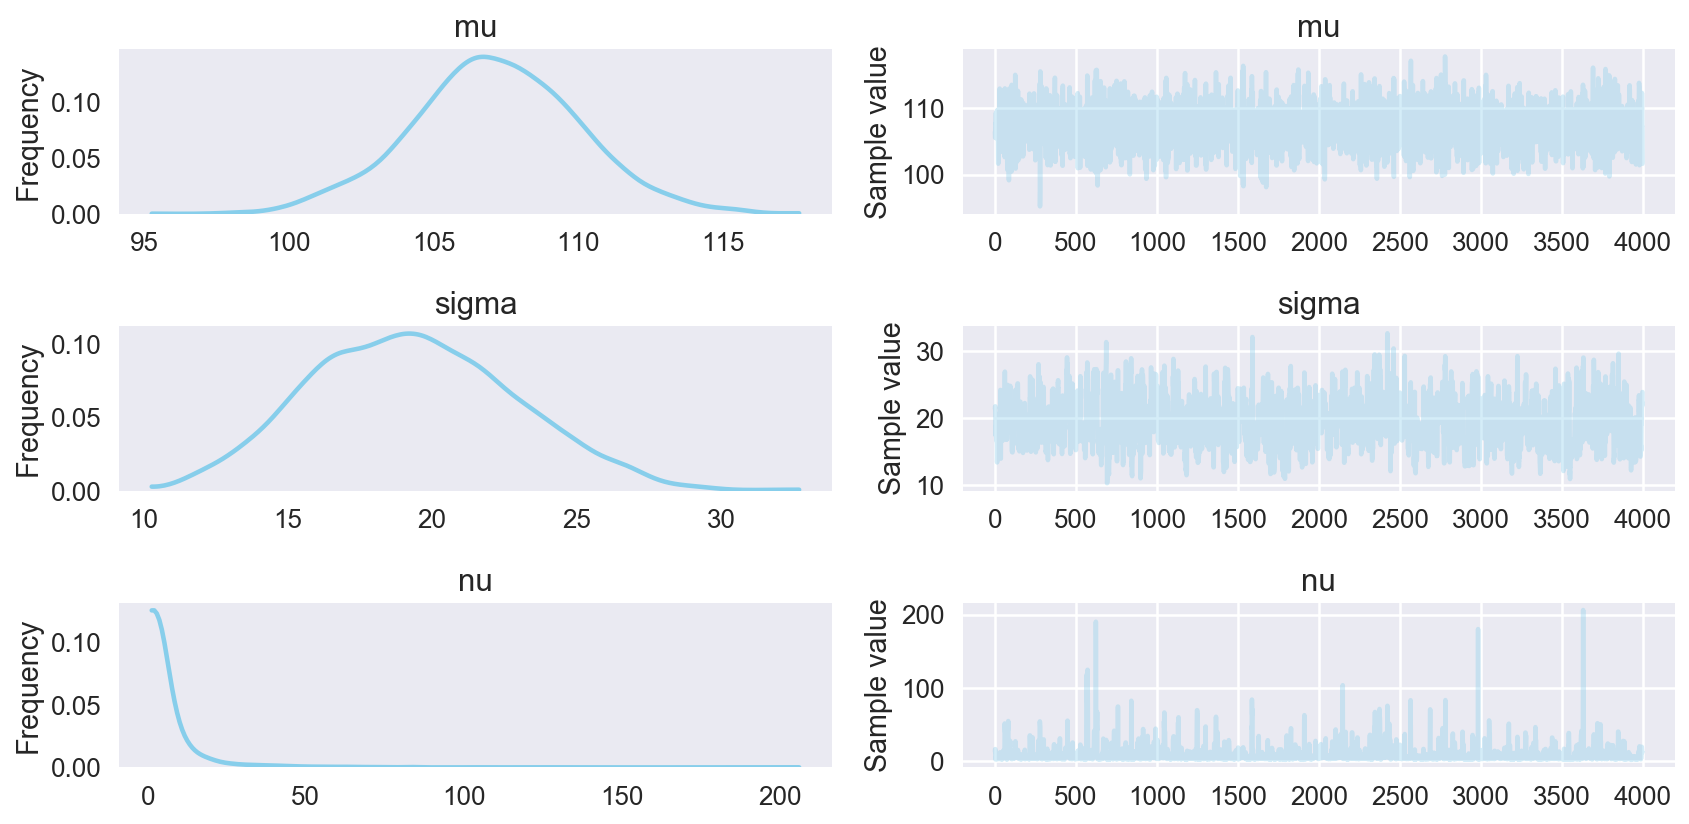

In [4]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113d61e50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1126f6510>], dtype=object)

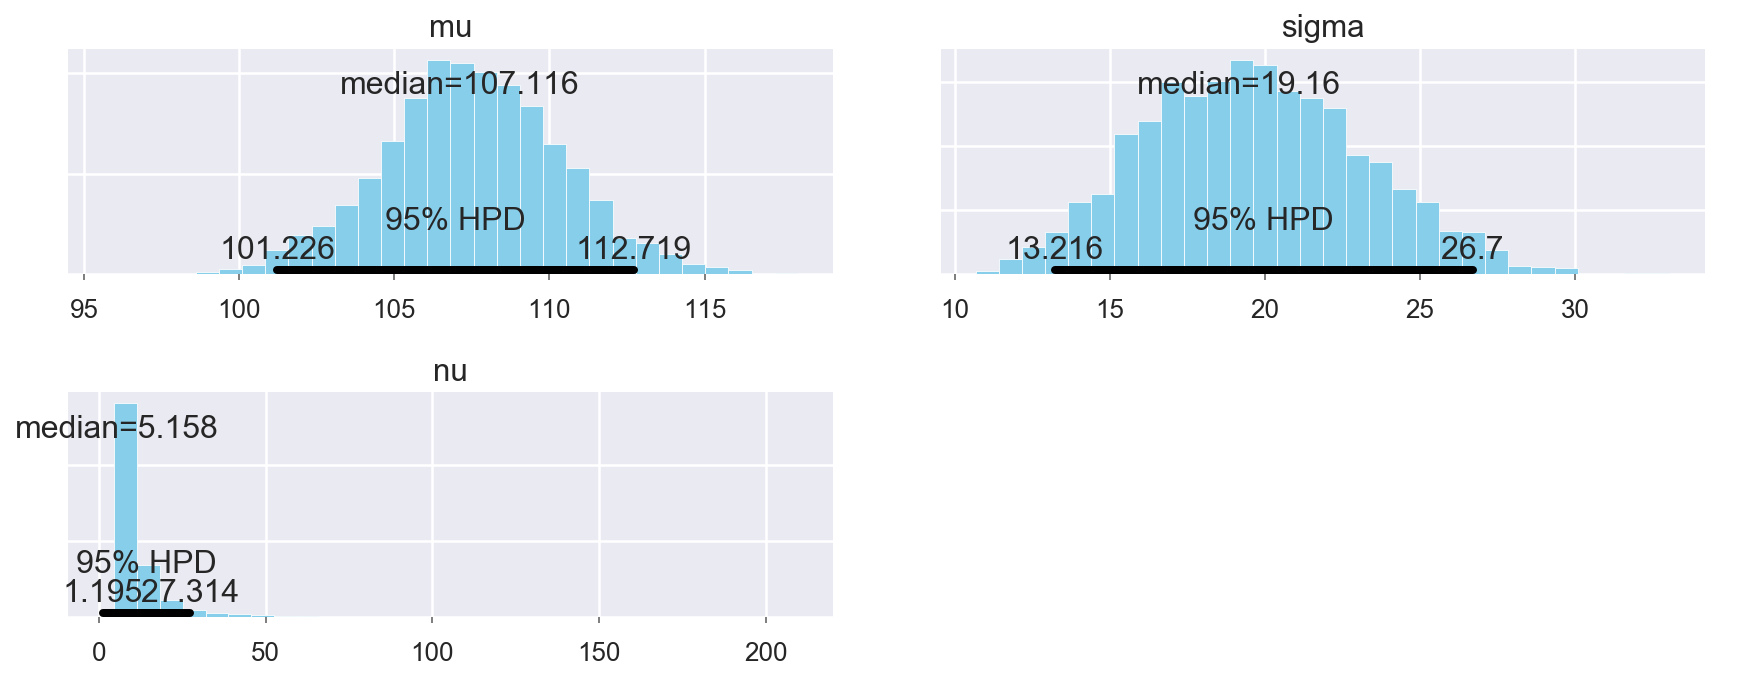

In [5]:
pm.plot_posterior(trace, point_estimate="median")

## Two Groups

Create a model for both `Smart Drug` and `Placebo` groups.

In [6]:
df["label"] = (df.Group == "Smart Drug").astype(int)
df.head()

,Score,Group,label
0,102,Smart Drug,1
1,107,Smart Drug,1
2,92,Smart Drug,1
3,101,Smart Drug,1
4,110,Smart Drug,1


In [7]:
n_groups = 2
with pm.Model() as model_two:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25, shape=n_groups)
    mu = pm.Normal("mu", mu=0, tau=1E-8, shape=n_groups)
    nu = pm.Gamma("nu", 2, .1)  # Recommendation from Stan docs
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu[df.label], sd=sigma[df.label], observed=df.Score)
    # Sample
    trace = pm.sample(draws=6000, tune=1000, chain=3)
    
burn_in = 2000
trace = trace[burn_in:]

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -677.42: 100%|██████████| 200000/200000 [00:28<00:00, 7117.92it/s]
Finished [100%]: Average ELBO = -664.43
100%|██████████| 6000/6000 [00:31<00:00, 193.31it/s]


                mean        sd  mc_error     hpd_2.5    hpd_97.5
mu__0      99.275372  1.772543  0.026690   95.974788  102.862679
mu__1     107.159648  2.640919  0.041156  102.023418  112.362800
sigma__0   11.431308  1.702853  0.055089    8.222814   14.839126
sigma__1   18.040143  2.748773  0.098538   13.001797   23.443872
nu          4.183146  1.890360  0.058322    1.629632    7.623119


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111c8a210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1113d1e10>]], dtype=object)

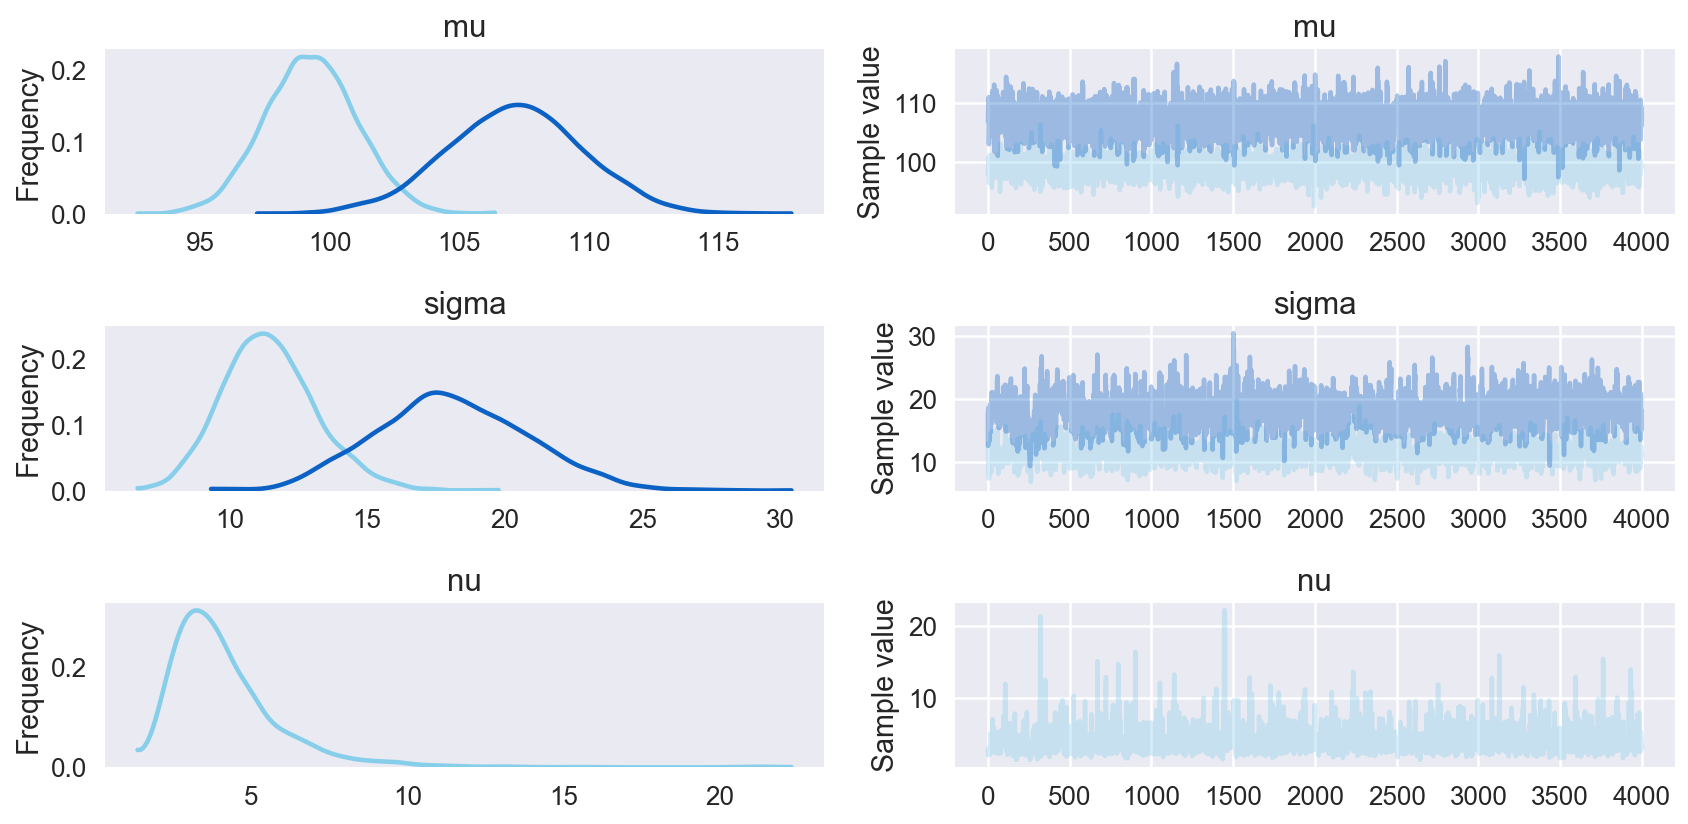

In [8]:
print(pm.df_summary(trace))
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1122e6cd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11535e250>], dtype=object)

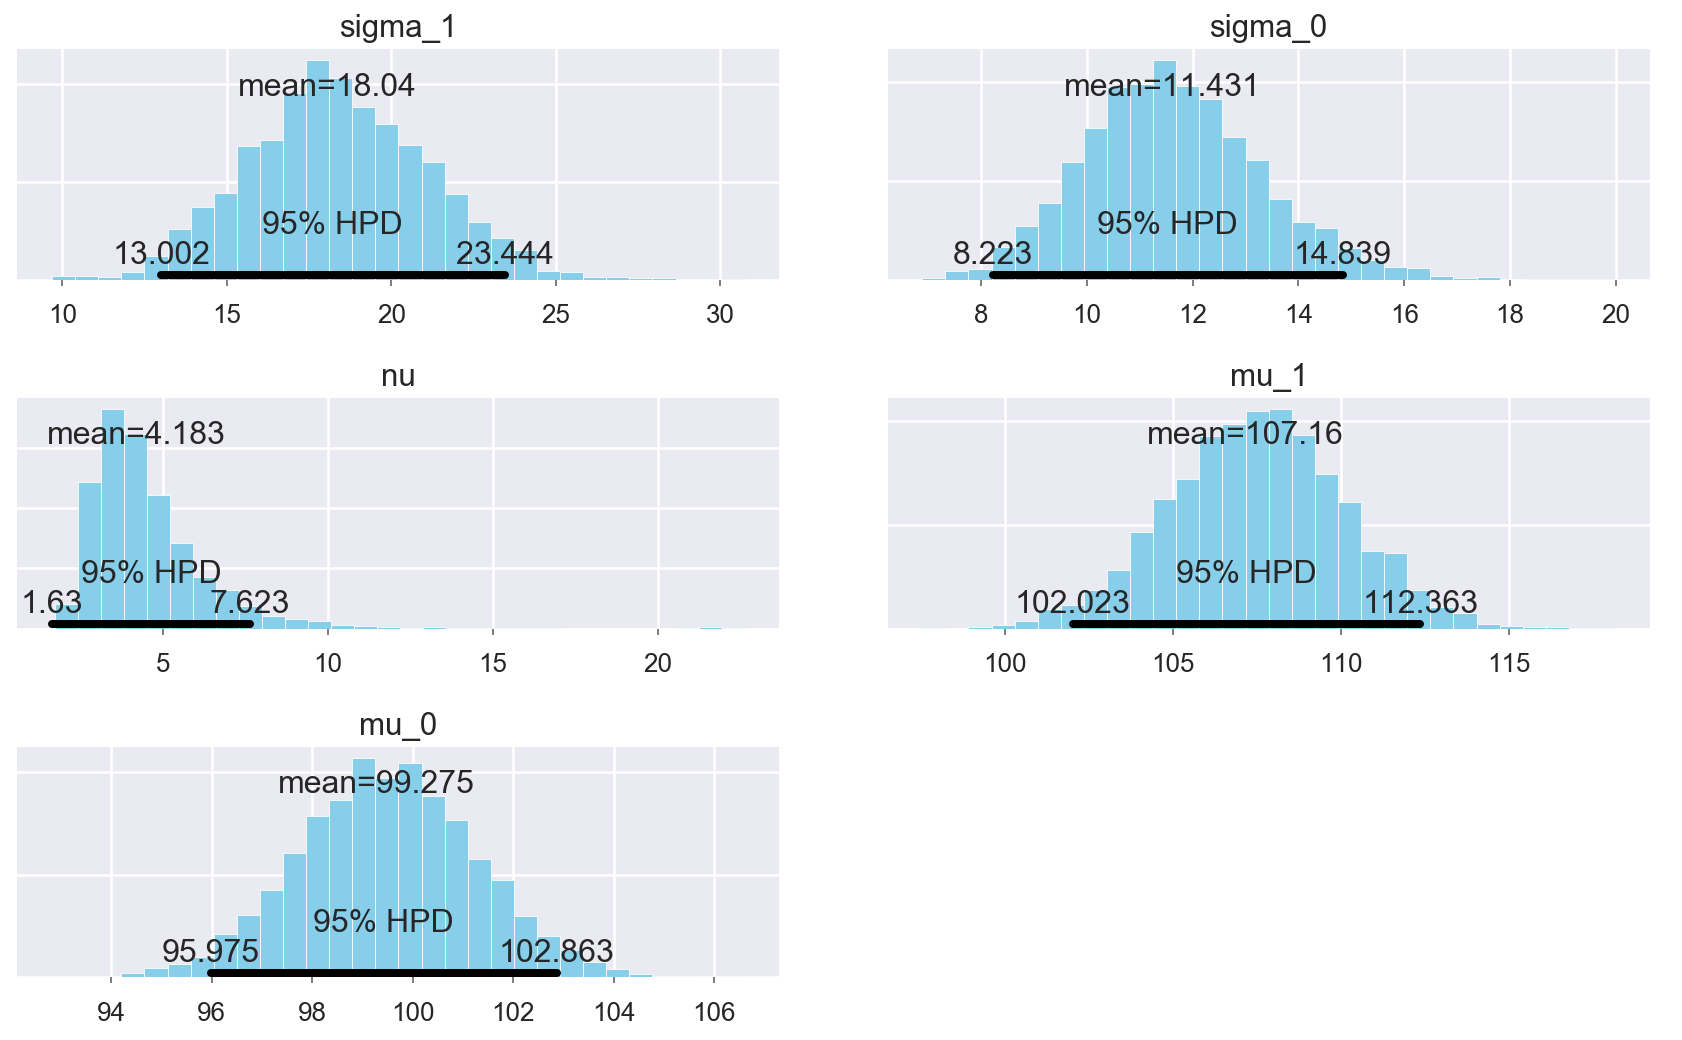

In [9]:
varnames = ["mu", "sigma", "nu"]
pm.plot_posterior(trace, varnames=varnames)